In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
#df = pd.read_csv('movielens/ml-latest-small/ratings.csv')[['userId','movieId','rating']]
header = ['userId', 'movieId', 'rating', 'timestamp']
df_train = pd.read_csv('./ml-100k/u1.base', sep='\t', names=header)
df_test = pd.read_csv('./ml-100k/u1.test', sep='\t', names=header)

In [85]:
len(df_train), len(df_test)
df_test

,userId,movieId,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
5,1,20,4,887431883
6,1,23,4,875072895
7,1,24,3,875071713
8,1,27,2,876892946
9,1,31,3,875072144


In [96]:
def get_user_item_matrix(dataframe, userIndexTag, itemIndexTag,ratingTag, base_1 = False):
    first = 0
    if base_1:
        first = 1
    n_users = dataframe[userIndexTag].unique().shape[0]
    n_items = dataframe[itemIndexTag].unique().shape[0]
    n_users = max(dataframe[userIndexTag]) 
    n_items = max(dataframe[itemIndexTag]) 
    R = np.zeros((n_users, n_items))
    for index, line in dataframe.iterrows():
        #print(line)
        R[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]
    return R

In [97]:
R_train = get_user_item_matrix(df_train, 'userId','movieId','rating', base_1 = True)

In [99]:
R_test = get_user_item_matrix(df_test, 'userId','movieId','rating', base_1 = True)

In [98]:
R_train.shape

(943, 1682)

In [101]:
R_test.shape

(462, 1591)

In [102]:
R_train[:,-2].sum()

3.0

In [103]:
from cf_helper_2 import Matrix_Factorization_baselines_SGD

In [104]:
mu = R_train[R_train.nonzero() ].mean()
R_rated_indexes_train = R_train.nonzero()
R_rated_indexes_test = R_test.nonzero()

In [105]:
R_train.shape

(943, 1682)

In [118]:
# gamma: Learning rate
P, Q, bu, bi, train_rmse_vector, test_rmse_vector, train_accuracy_vector, train_accuracy_vector, gamma, lmbda \
= Matrix_Factorization_baselines_SGD(R_train , R_test, R_rated_indexes_train, R_rated_indexes_test, mu, k=18 
                                     ,sigma = 0.002,
                           gamma= 0.01, lmbda = 0.05, alpha = 0., 
                           n_epochs = 70, error_calc_frec = 1,
                           accuracy_thres = 0, like = 1, dislike = -1)

epoch = -1 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (1.118553, 1.153675)
epoch = 0 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.968313, 1.003784)
epoch = 1 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.944543, 0.982860)
epoch = 2 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.934259, 0.973902)
epoch = 3 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.928506, 0.968879)
epoch = 4 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.924891, 0.965713)
epoch = 5 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.922444, 0.963571)
epoch = 6 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.920699, 0.962052)
epoch = 7 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.919400, 0.960940)
epoch = 8 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.918402, 0.960105)
epoch = 9 accuracy (train, test): (5.8987, 6.9550), rmse (train, test

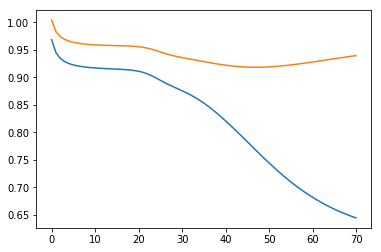

In [119]:
from matplotlib import pyplot as plt
plt.plot(train_rmse_vector)
plt.plot(test_rmse_vector)
plt.show()

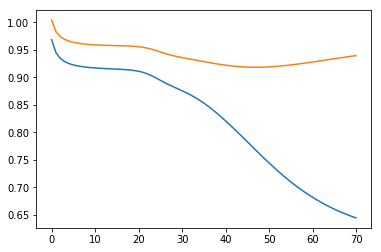

In [120]:
# gamma= 0.01, lmbda = 0.1
from matplotlib import pyplot as plt
plt.plot(train_rmse_vector)
plt.plot(test_rmse_vector)
plt.show()

In [125]:
RBM_Estimations_train = np.load('train_RBM.npy').T
RBM_Estimations_test = np.load('test_RBM.npy').T

In [126]:
RBM_Estimations_train.shape

(943, 1682)

In [135]:
(RBM_Estimations_train==0).sum()

1513582

In [136]:
(R_train==0).sum()

1506126

In [137]:
from cf_helper_2 import rmse

In [155]:
rmse(RBM_Estimations_train, R_train)

3.4982272276419182

In [145]:
rmse(R_test, RBM_Estimations_test)

3.6395810198428058

In [156]:
len(RBM_Estimations_test.nonzero()[1])

18007

In [152]:
len(R_train.nonzero()[0])

80000

In [113]:
def estimate_rates_RMB(RBM_Estimations, mu, bu, bi, P = np.array([0]), Q = np.array([0])):
    return mu + P.T.dot(Q) + bu + bi.T

def Matrix_Factorization_baselines_SGD_RBM(R_train , R_test, RBM_Estimations, R_rated_indexes_train, R_rated_indexes_test, mu, k=20 ,sigma = 0.002,
                           gamma= 0.01, lmbda = 0, alpha = 0, 
                           n_epochs = 100, error_calc_frec = 10,
                           accuracy_thres = 0, like = 1, dislike = -1):
    # n_epochs: Number of epochs
    # R_train: likes and dislikes user-item training matrix
    # k: Dimensionality of the latent feature space
    # lmbda: L2 regularization
    # gamma: Learning rate
    # alpha: momentum
    # sigma: P and Q standard deviation
    # error_calc_frec: calculate errors every error_calc_frec cicles
    
    m, n = R_train.shape  # Number of users and items
    
    P = np.random.normal(0,sigma,(k,m)) # Latent user feature matrix
    Q = np.random.normal(0,sigma,(k,n)) # Latent likes/dislikes feature matrix
    
    bu = np.random.normal(0,0.0002,(m,1))
    bi = np.random.normal(0,0.0002,(n,1))
    
    train_rmse_vector = []
    test_rmse_vector = []
    train_accuracy_vector = [] 
    test_accuracy_vector = []
    
    sys.stdout.write("epoch = %s " %-1)
    acurracy_tr, acurracy_te, rmse_tr, rmse_te = getStats(R_train, R_rated_indexes_train, R_test, R_rated_indexes_test, estimate_rates_RMB(RBM_Estimations, mu, bu, bi, P=P, Q=Q), accuracy_thres = accuracy_thres, like = like, dislike = dislike)
    
    all_users_items_cominations = list(zip(R_rated_indexes_train[0],R_rated_indexes_train[1]))
    
    deltaP = 0
    deltaQ = 0
    deltaBu = 0
    deltaBi = 0
    for epoch in range(n_epochs+1):
        for u, i in all_users_items_cominations:
            prediction = estimate_rates_RMB(RBM_Estimations[u,i], mu, bu[u], bi[i], P=P[:,u], Q=Q[:,i])
            error = R_train[u, i] - prediction   # Calculate error for gradient            
            deltaP = gamma * ( error * Q[:,i] - lmbda * P[:,u]) + alpha*deltaP
            deltaQ = gamma * ( error * P[:,u] - lmbda * Q[:,i]) + alpha*deltaQ
            
            deltaBu = gamma * ( error - lmbda * bu[u]) + alpha*deltaBu
            deltaBi = gamma * ( error - lmbda * bi[i]) + alpha*deltaBi
            bu[u] += deltaBu
            bi[i] += deltaBi
            
            P[:,u] += deltaP  # Update latent user feature matrix
            Q[:,i] += deltaQ  # Update latent movie feature matrix
        
        if (epoch%error_calc_frec==0):
            sys.stdout.write("epoch = %s " %epoch)
            acurracy_tr, acurracy_te, rmse_tr, rmse_te = getStats(R_train, R_rated_indexes_train, R_test, R_rated_indexes_test, estimate_rates_RMB(RBM_Estimations, mu, bu, bi, P=P, Q=Q), accuracy_thres = accuracy_thres, like = like, dislike = dislike)
            train_rmse_vector.append(rmse_tr)
            test_rmse_vector.append(rmse_te)
            train_accuracy_vector.append(acurracy_tr)
            test_accuracy_vector.append(acurracy_te)
    return P, Q, bu, bi, train_rmse_vector, test_rmse_vector, train_accuracy_vector, test_accuracy_vector, gamma, lmbda 

In [128]:
import sys
from cf_helper_2 import getStats
# gamma: Learning rate
output \
= Matrix_Factorization_baselines_SGD_RBM(R_train , R_test, RBM_Estimations_train , R_rated_indexes_train, R_rated_indexes_test, mu, k=18 
                                     ,sigma = 0.002,
                           gamma= 0.01, lmbda = 0.05, alpha = 0., 
                           n_epochs = 50, error_calc_frec = 1,
                           accuracy_thres = 0, like = 1, dislike = -1)

epoch = -1 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (1.118557, 1.153671)
epoch = 0 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.968313, 1.003781)
epoch = 1 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.944544, 0.982858)
epoch = 2 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.934259, 0.973902)
epoch = 3 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.928507, 0.968879)
epoch = 4 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.924891, 0.965712)
epoch = 5 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.922445, 0.963570)
epoch = 6 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.920700, 0.962052)
epoch = 7 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.919403, 0.960940)
epoch = 8 accuracy (train, test): (5.8987, 6.9550), rmse (train, test): (0.918406, 0.960106)
epoch = 9 accuracy (train, test): (5.8987, 6.9550), rmse (train, test

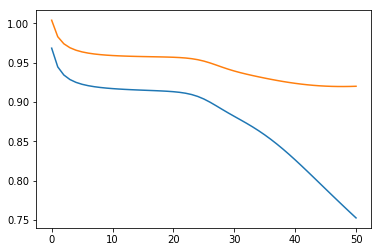

In [130]:
plt.plot(output[4])
plt.plot(output[5])
plt.show()